In [ ]:
%load_ext tensorboard
%tensorflow_version 2.x

In [ ]:
from __future__ import print_function

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.datasets import mnist
import tensorflow_datasets as tfds
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import backend as K
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import h5py
from skimage.transform import resize
from skimage.color import gray2rgb

batch_size = 256
num_classes = 10
num_epochs = 10
val_size = 5000

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
def load_data(path, val_size, num_classes):
    with h5py.File(path+'/train.hdf5', 'r') as f:
        shape = f["X"].shape
        x_train = f["X"][:shape[0]-val_size]
        y_train = f["Y"][:shape[0]-val_size].flatten()
        x_val = f["X"][shape[0]-val_size:]
        y_val = f["Y"][shape[0] - val_size:].flatten()

    with h5py.File(path+'/test.hdf5', 'r') as f:
        x_test = f["X"][:]
        y_test = f["Y"][:].flatten()

    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_val = keras.utils.to_categorical(y_val, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    return (x_train, y_train), (x_val, y_val), (x_test, y_test)

def show_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()
    
def show_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('#f Iterations')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [ ]:
# the data, split between train and test sets
# The full `train` split and the full `test` split as two distinct datasets.
(x_train_svhn_orig, y_train_svhn_orig), (x_val_svhn, y_val_svhn), (x_test_svhn, y_test_svhn) = load_data('drive/My Drive/Data/svhn', val_size, num_classes)
(x_train_syn_orig, y_train_syn_orig), (x_val_syn, y_val_syn), (x_test_syn, y_test_syn) = load_data('drive/My Drive/Data/synthNumbers', val_size, num_classes)

In [ ]:
input1 = keras.layers.Input(shape=(32,32,3))
conv1 = keras.layers.Conv2D(32, (3, 3), activation='relu')(input1)
conv2 = keras.layers.Conv2D(32, (3, 3), activation='relu')(conv1)
maxpool1 = keras.layers.MaxPooling2D((2, 2))(conv2)
dropout1 = keras.layers.Dropout(0.1)(maxpool1)
conv3 = keras.layers.Conv2D(64, (3, 3), activation='relu')(dropout1)
conv4 = keras.layers.Conv2D(64, (3, 3), activation='relu')(conv3)
maxpool2 = keras.layers.MaxPooling2D((2, 2))(conv4)
flatten = keras.layers.Flatten()(maxpool2)
dense2 = keras.layers.Dense(512, activation='relu')(flatten)
output = keras.layers.Dense(num_classes, activation='softmax')(dense2)

model = keras.Model(inputs=input1, outputs=[output])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928 

In [ ]:
epochs = 5
# fits the model on batches with real-time data augmentation:
history = model.fit(x_train_syn_orig, y_train_syn_orig, batch_size=batch_size, epochs=epochs, validation_data = (x_val_syn, y_val_syn))

Epoch 1/10
1854/1854 [==============================] - 261s 141ms/step - loss: 0.1638 - accuracy: 0.9494 - val_loss: 0.0576 - val_accuracy: 0.9810
Epoch 2/10
1854/1854 [==============================] - 275s 148ms/step - loss: 0.0374 - accuracy: 0.9883 - val_loss: 0.0299 - val_accuracy: 0.9902
Epoch 3/10
1854/1854 [==============================] - 274s 148ms/step - loss: 0.0242 - accuracy: 0.9925 - val_loss: 0.0237 - val_accuracy: 0.9916
Epoch 4/10
1854/1854 [==============================] - 274s 148ms/step - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.0213 - val_accuracy: 0.9924
Epoch 5/10
1854/1854 [==============================] - 273s 147ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0189 - val_accuracy: 0.9950
Epoch 6/10
1854/1854 [==============================] - 274s 148ms/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0288 - val_accuracy: 0.9932
Epoch 7/10
1854/1854 [==============================] - 271s 146ms/step - loss: 0.0102 - accuracy: 0.9968 - val_

In [ ]:
score = model.evaluate(x_test_svhn, y_test_svhn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7167064547538757
Test accuracy: 0.8498386740684509


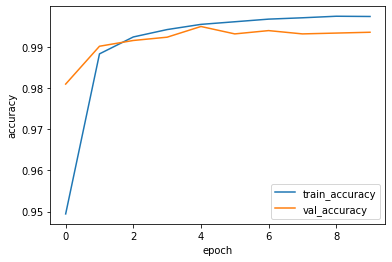

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='best')
plt.show()